In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
dataset = pd.read_csv('diabetes.csv')

In [25]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
zero_not_accepted = ['Glucose','BloodPressure','SkinThickness','BMI','Insulin']

for col in zero_not_accepted:
    dataset[col]= dataset[col].replace(0,np.NaN)
    mean = int(dataset[col].mean(skipna=True))
    dataset[col] = dataset[col].replace(np.NaN,mean)

In [27]:
X = dataset.iloc[:,0:8]

In [28]:
y = dataset.iloc[:,8]

<AxesSubplot:>

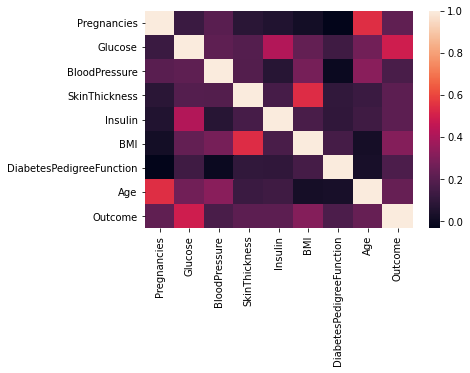

In [29]:
sns.heatmap(dataset.corr())

<AxesSubplot:xlabel='Age', ylabel='count'>

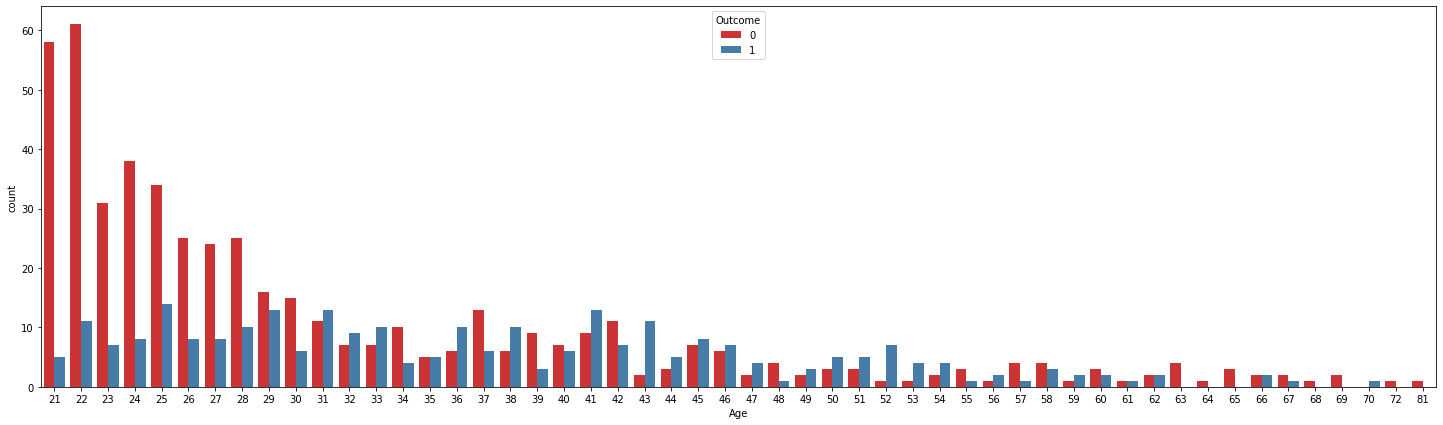

In [31]:
plt.figure(figsize=(25,7))
sns.countplot(x='Age',hue='Outcome',data=dataset,palette='Set1')

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
classifier = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')

In [35]:
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [36]:
y_pred = classifier.predict(X_test)

In [37]:
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)
print(f1_score(y_test,y_pred, average='micro'))

[[94 13]
 [15 32]]
0.8181818181818182


In [38]:
print(accuracy_score(y_test,y_pred))

0.8181818181818182
